In [1]:
# Contoh 1: Penggunaan modulus dengan bilangan bulat
a = 17
b = 5
result_int = a % b
print(f"{a} % {b} = {result_int}")  # Output: 17 % 5 = 2


17 % 5 = 2


In [2]:
# Contoh 2: Penggunaan modulus dengan bilangan pecahan
x = 10.5
y = 3.2
result_float = x % y
print(f"{x} % {y} = {result_float}")  # Output: 10.5 % 3.2 = 1.2999999999999998


10.5 % 3.2 = 0.8999999999999995


In [3]:
# Contoh 3: Penggunaan modulus dengan bilangan negatif
c = -15
d = 7
result_negative = c % d
print(f"{c} % {d} = {result_negative}")  # Output: -15 % 7 = 6


-15 % 7 = 6


In [4]:
def custom_modulo(dividend, divisor):
    # Pastikan divisor tidak nol untuk menghindari error pembagian dengan nol
    if divisor == 0:
        return "Error: Division by zero"

    remainder = abs(dividend)
    divisor = abs(divisor)
    
    # Kurangi dividend dengan divisor secara berulang hingga sisa kurang dari divisor
    while remainder >= divisor:
        remainder -= divisor
    # Jika dividend asli negatif, sesuaikan tanda hasil
    if dividend < 0:
        return -remainder
    return remainder

# Contoh penggunaan fungsi custom_modulo
print(custom_modulo(17, 5))  # Output: 2


2


In [5]:
# Contoh penggunaan divmod dengan bilangan bulat
result_tuple = divmod(15, 4)
print(f"divmod(15, 4) = {result_tuple}")  # Output: (3, 3)

# Contoh penggunaan divmod dengan bilangan pecahan
result_tuple_float = divmod(9.6, 2)
print(f"divmod(9.6, 2) = {result_tuple_float}")  # Output: (4.0, 1.5999999999999996)


divmod(15, 4) = (3, 3)
divmod(9.6, 2) = (4.0, 1.5999999999999996)


DataFrame:
  Email Address         Nama Lengkap Mahasiswa       NIM  \
0           NaN                            NaN       NaN   
1           NaN  Samuel Saut Royzeki Aritonang  11422026   
2           NaN            Calvin Josep Silaen  11422038   
3           NaN                Indah Silitonga  11422060   
4           NaN             Asri Yohana Sirait  11422029   

                             Program Studi Mahasiswa Angkatan Mahasiswa  \
0                                                NaN                NaN   
1  Sarjana Terapan Teknologi Rekayasa Perangkat L...               2022   
2  Sarjana Terapan Teknologi Rekayasa Perangkat L...               2022   
3  Sarjana Terapan Teknologi Rekayasa Perangkat L...               2022   
4  Sarjana Terapan Teknologi Rekayasa Perangkat L...               2022   

  Berapa lama waktu yang Anda habiskan menggunakan laptop setiap hari?  \
0                                                NaN                     
1                            

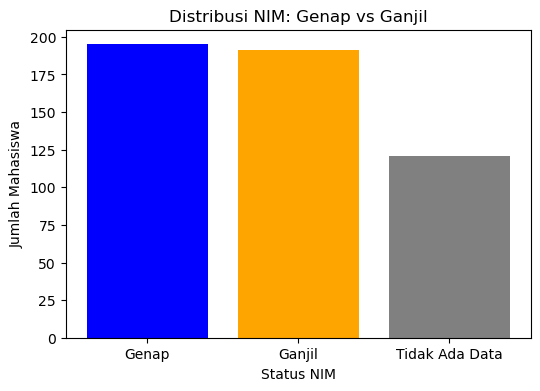

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Load dataset "Data_Mahasiswa.csv" dengan separator titik koma
df = pd.read_csv('Data_Mahasiswa.csv', sep=';')

# Menghapus spasi ekstra dari nama kolom agar konsisten
df.columns = df.columns.str.strip()

# Tampilkan beberapa baris pertama untuk verifikasi
print("DataFrame:")
print(df.head())

# Tampilkan dimensi dataset
print("Dimensi Data:", df.shape)

# Pastikan kolom 'NIM' diubah ke tipe numerik (jika masih berbentuk string)
df['NIM'] = pd.to_numeric(df['NIM'], errors='coerce')

# Gunakan operator modulus untuk menentukan apakah NIM genap atau ganjil
# Jika NIM valid (tidak NaN), jika NIM % 2 == 0 maka 'Genap', sebaliknya 'Ganjil'
df['Status_NIM'] = df['NIM'].apply(lambda x: 'Genap' if pd.notnull(x) and x % 2 == 0 else ('Ganjil' if pd.notnull(x) else 'Tidak Ada Data'))

# Tampilkan kolom NIM dan Status_NIM untuk beberapa baris pertama
print("\nData dengan Status_NIM:")
print(df[['NIM', 'Status_NIM']].head())

# Analisis tambahan: hitung jumlah mahasiswa dengan NIM genap dan ganjil
jumlah_genap = df[df['Status_NIM'] == 'Genap'].shape[0]
jumlah_ganjil = df[df['Status_NIM'] == 'Ganjil'].shape[0]
print(f"\nJumlah mahasiswa dengan NIM Genap: {jumlah_genap}")
print(f"Jumlah mahasiswa dengan NIM Ganjil: {jumlah_ganjil}")

# Visualisasi sederhana: Distribusi NIM berdasarkan Status (Genap/Ganjil)
status_counts = df['Status_NIM'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(status_counts.index, status_counts.values, color=['blue', 'orange', 'gray'])
plt.title('Distribusi NIM: Genap vs Ganjil')
plt.xlabel('Status NIM')
plt.ylabel('Jumlah Mahasiswa')
plt.show()
